In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from optimization import GradientDescent, sample_mini_batches
from utils import train, plot_decision

In [76]:
lb =  LabelBinarizer()

In [77]:
X, Y = datasets.make_classification(
    n_samples=10_000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=2,
    hypercube=True,
    random_state=42
)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=1
)
Y_train_ = Y_train
Y_train = lb.fit_transform(Y_train)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train, dtype=tf.float32), tf.cast(Y_train, dtype=tf.int32))
    ).shuffle(X_train.shape[0]).batch(64)

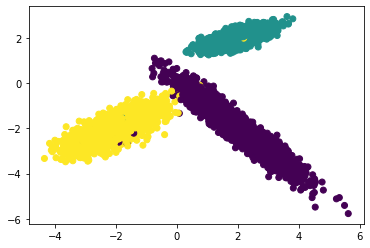

In [79]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train_.ravel())

Epoch 0: train cost = 0.9220314025878906
Epoch 1: train cost = 0.6930283308029175
Epoch 2: train cost = 0.6079238653182983
Epoch 3: train cost = 0.688190221786499
Epoch 4: train cost = 0.6845918297767639
Epoch 5: train cost = 0.6258198022842407
Epoch 6: train cost = 0.5663659572601318
Epoch 7: train cost = 0.5950332880020142
Epoch 8: train cost = 0.6461560726165771
Epoch 9: train cost = 0.5769616961479187
Epoch 10: train cost = 0.6411474347114563
Epoch 11: train cost = 0.5475148558616638
Epoch 12: train cost = 0.4167702794075012
Epoch 13: train cost = 0.4740952253341675
Epoch 14: train cost = 0.5846012830734253
Epoch 15: train cost = 0.5275201797485352
Epoch 16: train cost = 0.5552037954330444
Epoch 17: train cost = 0.7772639393806458
Epoch 18: train cost = 0.5700188875198364
Epoch 19: train cost = 0.554595947265625
Epoch 20: train cost = 0.6279058456420898
Epoch 21: train cost = 0.5550565719604492
Epoch 22: train cost = 0.5365380048751831
Epoch 23: train cost = 0.552577555179596
Epoch

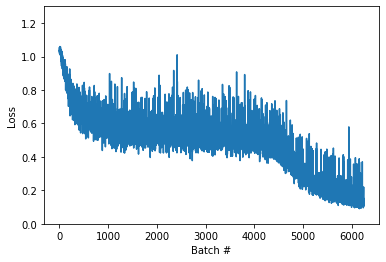

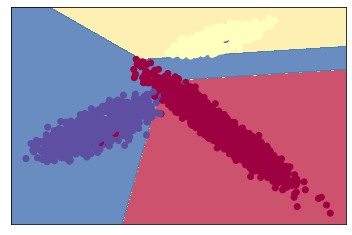

In [7]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train, dtype=tf.float32), tf.cast(Y_train, dtype=tf.int32))
    ).shuffle(X_train.shape[0]).batch(64)

loss = tf.keras.losses.CategoricalCrossentropy()
gradient_descent = tf.keras.optimizers.SGD(learning_rate=0.01)

inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(3, activation='relu')(inputs)
x = tf.keras.layers.Dense(3, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

clf = tf.keras.Model(inputs=inputs, outputs=outputs)

train(
    NN=clf,
    dataset=dataset,
    loss=loss,
    optimizer=gradient_descent,
    epochs=50
)

plot_decision(clf, X_train, Y_train_)

In [12]:
tf.random.set_seed(42)

loss = tf.keras.losses.CategoricalCrossentropy()
gradient_descent = GradientDescent(learning_rate=0.01)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train, dtype=tf.float32), tf.cast(Y_train, dtype=tf.int32))
    ).shuffle(X_train.shape[0]).batch(64)

inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(3, activation='relu')(inputs)
x = tf.keras.layers.Dense(3, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

clf = tf.keras.Model(inputs=inputs, outputs=outputs)

train(
    NN=clf,
    dataset=dataset,
    loss=loss,
    optimizer=gradient_descent,
    epochs=50
)

plot_decision(clf, X_train, Y_train_)

Epoch 0: train cost = 0.9220314025878906
Epoch 1: train cost = 0.6930283308029175
Epoch 2: train cost = 0.6079238653182983


KeyboardInterrupt: 

Epoch 0: train cost = 1.0461877584457397
Epoch 50: train cost = 0.6622318625450134
Epoch 100: train cost = 0.5942530632019043
Epoch 150: train cost = 0.5674265027046204
Epoch 200: train cost = 0.5539454817771912
Epoch 250: train cost = 0.5448927283287048
Epoch 300: train cost = 0.5381377935409546
Epoch 350: train cost = 0.5310723781585693
Epoch 400: train cost = 0.5151856541633606
Epoch 450: train cost = 0.439573734998703
Epoch 500: train cost = 0.2745506465435028
Epoch 550: train cost = 0.19030645489692688
Epoch 600: train cost = 0.15022870898246765
Epoch 650: train cost = 0.1268271952867508
Epoch 700: train cost = 0.11132188141345978
Epoch 750: train cost = 0.10038194060325623
Epoch 800: train cost = 0.0921878069639206
Epoch 850: train cost = 0.08574404567480087
Epoch 900: train cost = 0.08053216338157654
Epoch 950: train cost = 0.07601862400770187


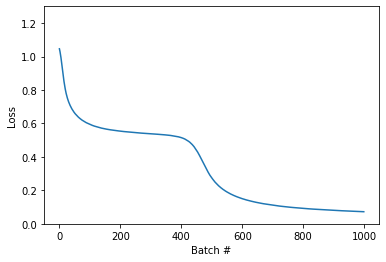

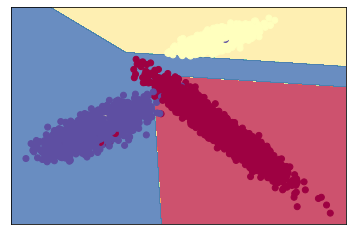

In [9]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train, dtype=tf.float32), tf.cast(Y_train, dtype=tf.int32))
    ).shuffle(X_train.shape[0]).batch(X_train.shape[0])

loss = tf.keras.losses.CategoricalCrossentropy()
gradient_descent = tf.keras.optimizers.SGD(learning_rate=0.1)

inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(3, activation='relu')(inputs)
x = tf.keras.layers.Dense(3, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

clf = tf.keras.Model(inputs=inputs, outputs=outputs)

train(
    NN=clf,
    dataset=dataset,
    loss=loss,
    optimizer=gradient_descent,
    epochs=1_000,
    print_period=50,
)

plot_decision(clf, X_train, Y_train_)

Epoch 0: train cost = 1.0461877584457397
Epoch 50: train cost = 0.6622318625450134
Epoch 100: train cost = 0.5942530632019043
Epoch 150: train cost = 0.5674265027046204
Epoch 200: train cost = 0.5539454817771912
Epoch 250: train cost = 0.5448927283287048
Epoch 300: train cost = 0.5381377935409546
Epoch 350: train cost = 0.5310723781585693
Epoch 400: train cost = 0.5151856541633606
Epoch 450: train cost = 0.439573734998703
Epoch 500: train cost = 0.2745506465435028
Epoch 550: train cost = 0.19030645489692688
Epoch 600: train cost = 0.15022870898246765
Epoch 650: train cost = 0.1268271952867508
Epoch 700: train cost = 0.11132188141345978
Epoch 750: train cost = 0.10038194060325623
Epoch 800: train cost = 0.0921878069639206
Epoch 850: train cost = 0.08574404567480087
Epoch 900: train cost = 0.08053216338157654
Epoch 950: train cost = 0.07601862400770187


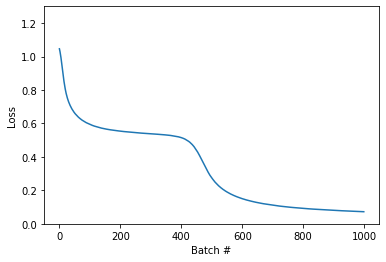

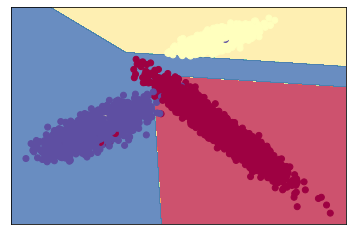

In [10]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train, dtype=tf.float32), tf.cast(Y_train, dtype=tf.int32))
    ).shuffle(X_train.shape[0]).batch(X_train.shape[0])

loss = tf.keras.losses.CategoricalCrossentropy()
gradient_descent = GradientDescent(learning_rate=0.1)

inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(3, activation='relu')(inputs)
x = tf.keras.layers.Dense(3, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

clf = tf.keras.Model(inputs=inputs, outputs=outputs)

train(
    NN=clf,
    dataset=dataset,
    loss=loss,
    optimizer=gradient_descent,
    epochs=1_000,
    print_period=50,
)

plot_decision(clf, X_train, Y_train_)

Epoch 0: train cost = 0.6229134798049927
Epoch 1: train cost = 0.5258674621582031
Epoch 2: train cost = 0.44649186730384827
Epoch 3: train cost = 0.3999961018562317
Epoch 4: train cost = 0.20353862643241882
Epoch 5: train cost = 0.07414672523736954
Epoch 6: train cost = 0.10279740393161774
Epoch 7: train cost = 0.04950019717216492
Epoch 8: train cost = 0.0356755331158638
Epoch 9: train cost = 0.030937153846025467
Epoch 10: train cost = 0.12710808217525482
Epoch 11: train cost = 0.029024356976151466
Epoch 12: train cost = 0.014120638370513916
Epoch 13: train cost = 0.01396678015589714
Epoch 14: train cost = 0.013387000188231468
Epoch 15: train cost = 0.012015175074338913
Epoch 16: train cost = 0.010790521278977394
Epoch 17: train cost = 0.11988776177167892
Epoch 18: train cost = 0.010244963690638542
Epoch 19: train cost = 0.015761690214276314
Epoch 20: train cost = 0.04037974402308464
Epoch 21: train cost = 0.11685697734355927
Epoch 22: train cost = 0.019283946603536606
Epoch 23: train 

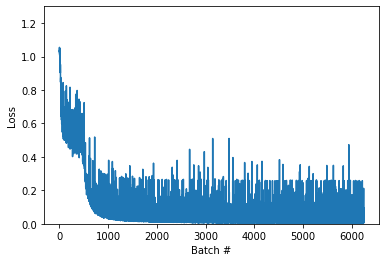

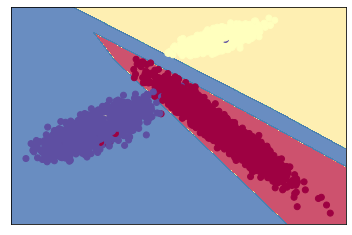

In [7]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train, dtype=tf.float32), tf.cast(Y_train, dtype=tf.int32))
    ).shuffle(X_train.shape[0]).batch(64)

loss = tf.keras.losses.CategoricalCrossentropy()
gradient_descent = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(3, activation='relu')(inputs)
x = tf.keras.layers.Dense(3, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

clf = tf.keras.Model(inputs=inputs, outputs=outputs)

train(
    NN=clf,
    dataset=dataset,
    loss=loss,
    optimizer=gradient_descent,
    epochs=50
)

plot_decision(clf, X_train, Y_train_)

In [ ]:
tf.random.set_seed(42)

loss = tf.keras.losses.CategoricalCrossentropy()
gradient_descent = GradientDescent(learning_rate=0.01, momentum=0.9)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train, dtype=tf.float32), tf.cast(Y_train, dtype=tf.int32))
    ).shuffle(X_train.shape[0]).batch(64)

inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(3, activation='relu')(inputs)
x = tf.keras.layers.Dense(3, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

clf = tf.keras.Model(inputs=inputs, outputs=outputs)

train(
    NN=clf,
    dataset=dataset,
    loss=loss,
    optimizer=gradient_descent,
    epochs=50
)

plot_decision(clf, X_train, Y_train_)